In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
load_data = pd.read_csv("loan_data.csv")
load_data.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [2]:
# Obtener el resumen de 5 números de las variables numéricas
load_data.describe().loc[['min', '25%', '50%', '75%', 'max']]

credit.policy  int.rate  installment  log.annual.inc      dti   fico  \
min            0.0    0.0600      15.6700        7.547502   0.0000  612.0   
25%            1.0    0.1039     163.7700       10.558414   7.2125  682.0   
50%            1.0    0.1221     268.9500       10.928884  12.6650  707.0   
75%            1.0    0.1407     432.7625       11.291293  17.9500  737.0   
max            1.0    0.2164     940.1400       14.528354  29.9600  827.0   

     days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
min         178.958333        0.0         0.0             0.0          0.0   
25%        2820.000000     3187.0        22.6             0.0          0.0   
50%        4139.958333     8596.0        46.3             1.0          0.0   
75%        5730.000000    18249.5        70.9             2.0          0.0   
max       17639.958330  1207359.0       119.0            33.0         13.0   

     pub.rec  not.fully.paid  
min      0.0             0.0  
25%      0.0             0.0  
50%      0.0             0.0  
75%      0.0             0.0  
max      5.0             1.0

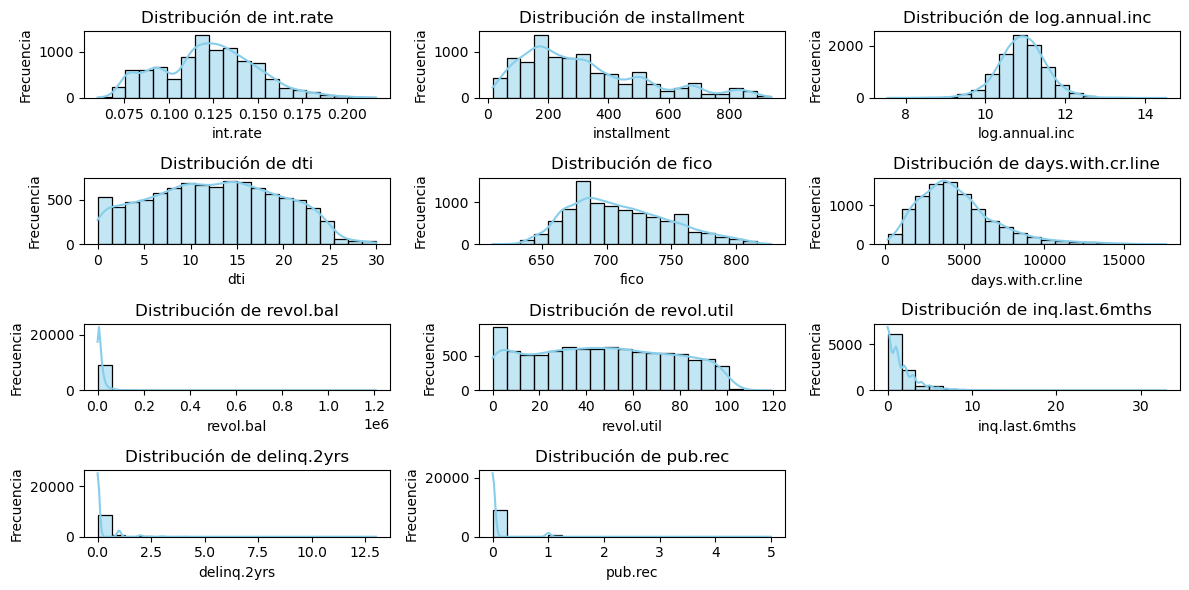

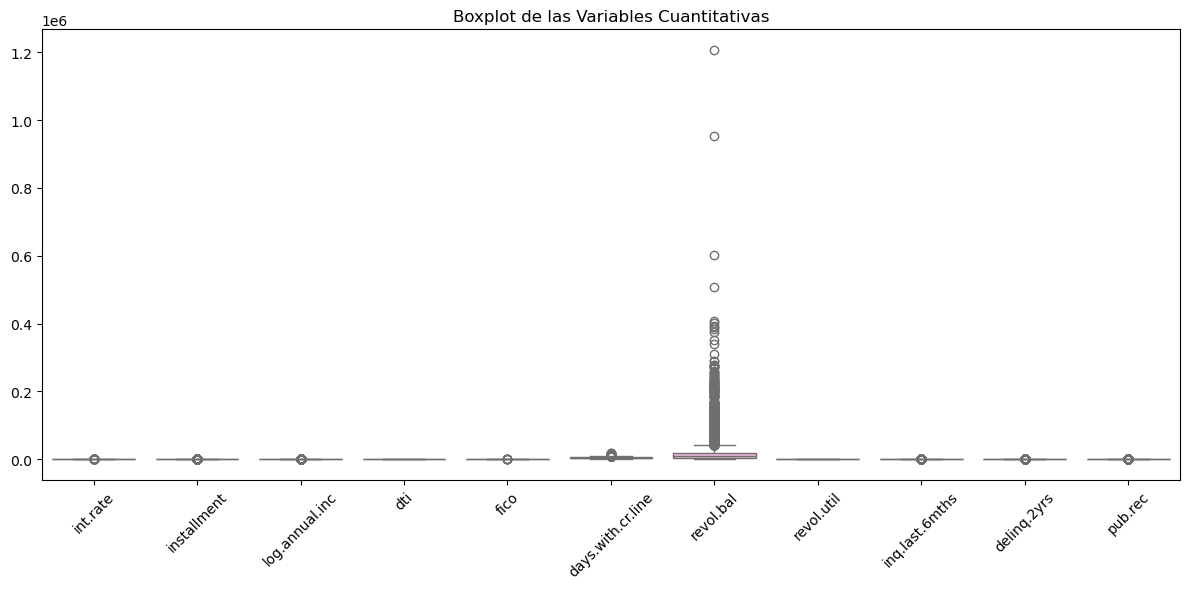

C:\Users\bryan\AppData\Local\Temp\ipykernel_8264\3948284056.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=load_data[columna], ax=axes_individual[i], color="skyblue", palette="pastel")
C:\Users\bryan\AppData\Local\Temp\ipykernel_8264\3948284056.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=load_data[columna], ax=axes_individual[i], color="skyblue", palette="pastel")
C:\Users\bryan\AppData\Local\Temp\ipykernel_8264\3948284056.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=load_data[columna], ax=axes_individual[i], col

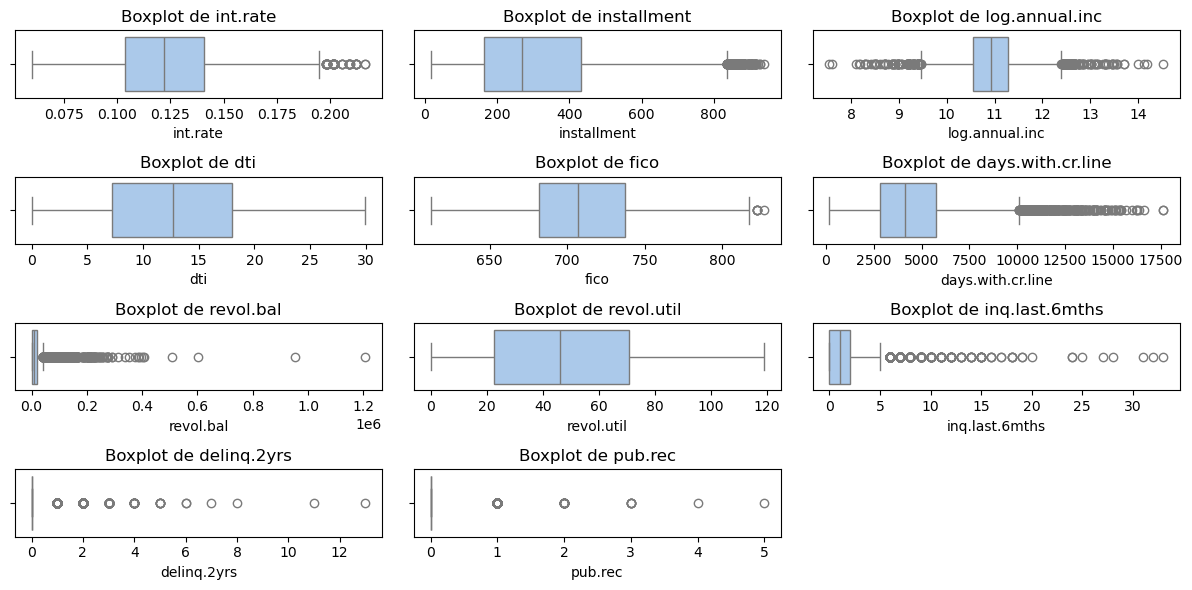

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo columnas numéricas
datos_cuantitativos = load_data.select_dtypes(include=['number']).drop(columns=['credit.policy', 'not.fully.paid'])

# Número de columnas en la cuadrícula
n_cols = 3  # Puedes ajustar este valor dependiendo de cuántos histogramas tengas
n_rows = (len(datos_cuantitativos.columns) + n_cols - 1) // n_cols  # Calcular el número de filas necesarias

# Crear la figura y los subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))

# Aplanar el arreglo de ejes para facilitar la iteración
axes = axes.flatten()

# Crear histogramas para cada variable cuantitativa
for i, columna in enumerate(datos_cuantitativos.columns):
    sns.histplot(load_data[columna], kde=True, bins=20, color="skyblue", ax=axes[i])
    axes[i].set_title(f'Distribución de {columna}')
    axes[i].set_xlabel(columna)
    axes[i].set_ylabel('Frecuencia')

# Eliminar los ejes vacíos (si hay alguno) en la cuadrícula
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Ajustar el diseño para que no se solapen
plt.tight_layout()

# Guardar la imagen con todos los histogramas
plt.savefig('distribuciones.png')

# Mostrar el gráfico final de los histogramas
plt.show()

# Crear boxplots para visualizar la dispersión (todos juntos)
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos_cuantitativos, palette="pastel")
plt.title("Boxplot de las Variables Cuantitativas")
plt.xticks(rotation=45)
plt.tight_layout()  # Asegura que los elementos del gráfico no se solapen

# Guardar el gráfico de boxplots
plt.savefig('boxplot.png')

# Mostrar el gráfico final de los boxplots
plt.show()

# Crear boxplots individuales para cada variable cuantitativa y guardarlos en una sola imagen
# Número de columnas en la cuadrícula para los boxplots individuales
n_cols_individual = 3  # Puedes ajustar este valor dependiendo de cuántos boxplots tengas
n_rows_individual = (len(datos_cuantitativos.columns) + n_cols_individual - 1) // n_cols_individual  # Calcular el número de filas necesarias

# Crear la figura y los subgráficos para los boxplots individuales
fig, axes_individual = plt.subplots(n_rows_individual, n_cols_individual, figsize=(12, 6))

# Aplanar el arreglo de ejes para facilitar la iteración
axes_individual = axes_individual.flatten()

# Crear boxplots individuales para cada variable cuantitativa
for i, columna in enumerate(datos_cuantitativos.columns):
    sns.boxplot(x=load_data[columna], ax=axes_individual[i], color="skyblue", palette="pastel")
    axes_individual[i].set_title(f'Boxplot de {columna}')
    axes_individual[i].set_xlabel(columna)

# Eliminar los ejes vacíos (si hay alguno) en la cuadrícula
for j in range(i + 1, len(axes_individual)):
    axes_individual[j].axis('off')

# Ajustar el diseño para que no se solapen
plt.tight_layout()

# Guardar la imagen con todos los boxplots individuales
plt.savefig('boxplots_individuales.png')

# Mostrar el gráfico final de los boxplots individuales
plt.show()



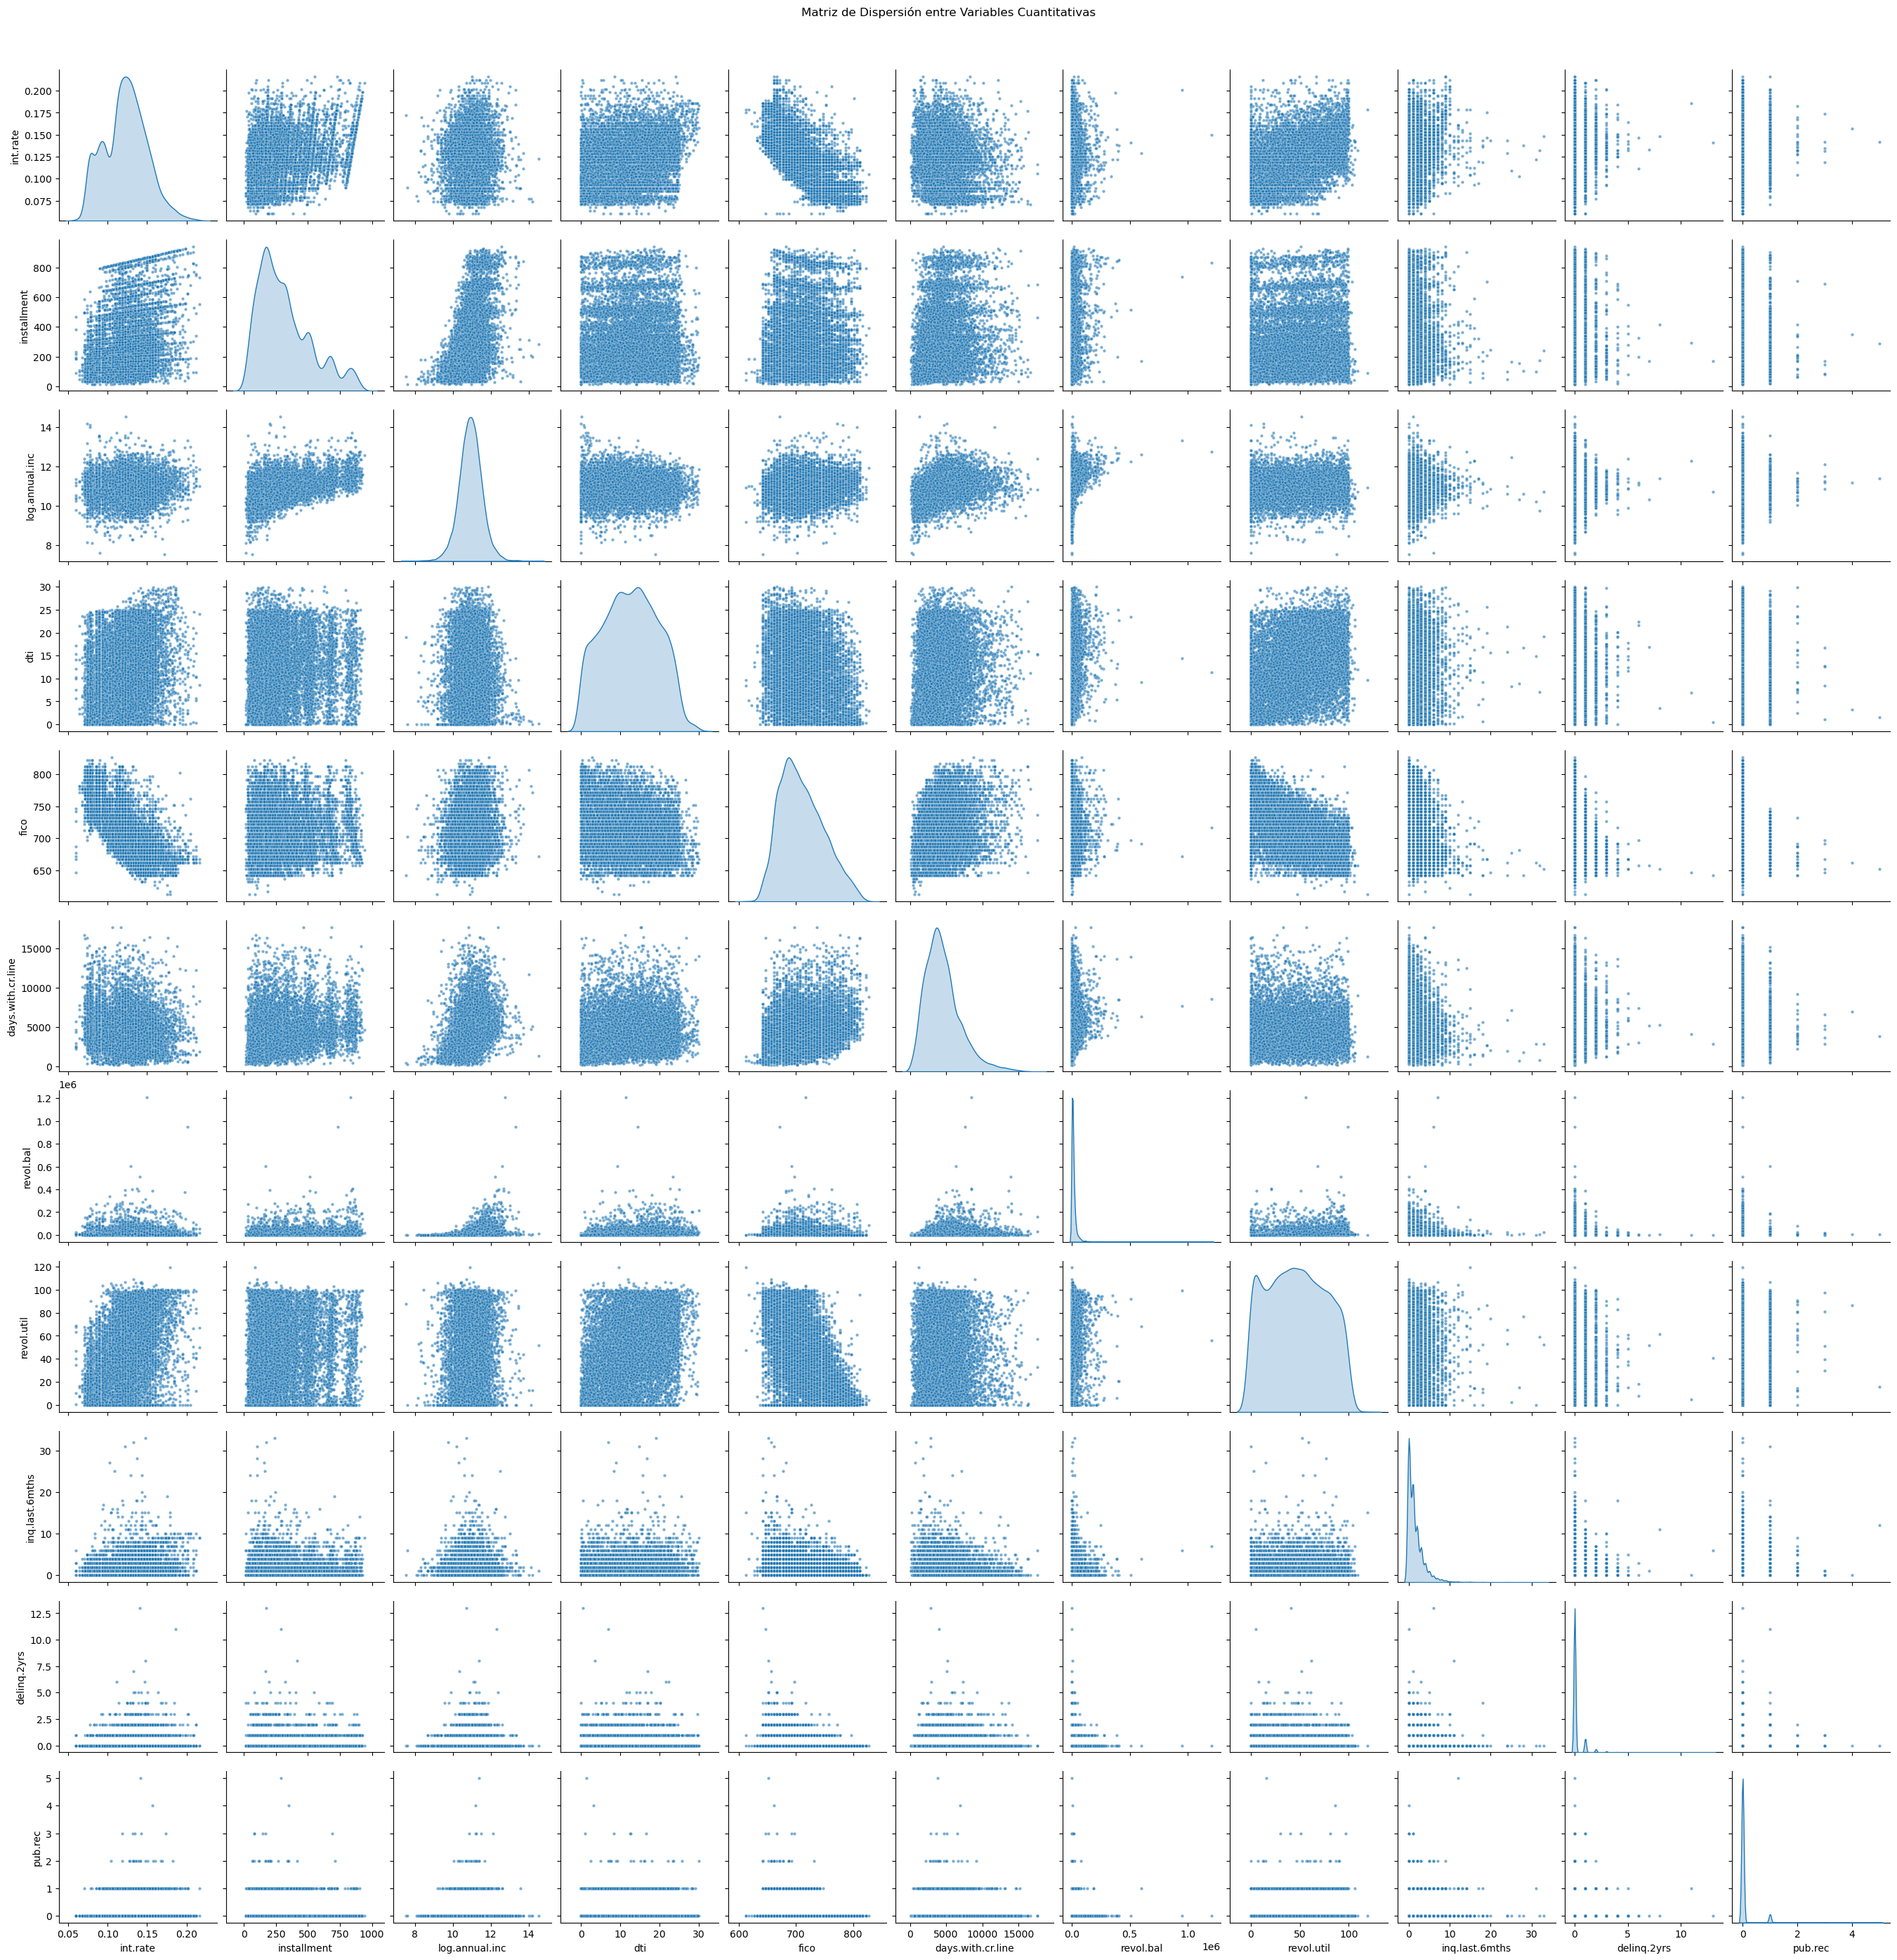

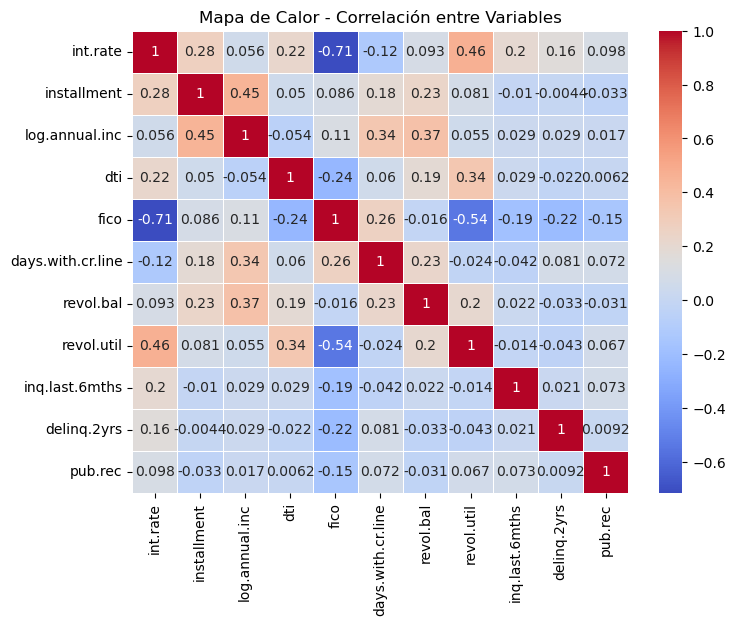

In [8]:
# Filtrar solo las columnas numéricas
datos_cuantitativos = load_data.select_dtypes(include=['number']).drop(columns=['credit.policy', 'not.fully.paid'])

# 🔹 1. Pairplot - Matriz de dispersión
sns.pairplot(datos_cuantitativos, diag_kind="kde", plot_kws={'alpha':0.6, 's':10})
plt.suptitle("Matriz de Dispersión entre Variables Cuantitativas", y=1.02)
plt.savefig('Matriz de dispersion.png')  # Guardar la imagen antes de mostrarla
plt.show()

# 🔹 2. Heatmap (Mapa de calor de correlación)
plt.figure(figsize=(8, 6))
sns.heatmap(datos_cuantitativos.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor - Correlación entre Variables")
plt.savefig('Matriz de correlacion.png')  # Guardar la imagen antes de mostrarla
plt.show()
